In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

from modcma import c_maes

%matplotlib inline

In [2]:
def func(x):
    xopt = np.array([.7, -.4])
    return np.linalg.norm(x - xopt)

def f(x, y):
    return func(np.array([x, y]))
v_func = np.vectorize(f)

In [3]:
dim = 2
modules = c_maes.parameters.Modules()
modules.matrix_adaptation = c_maes.options.MatrixAdaptationType.COVARIANCE

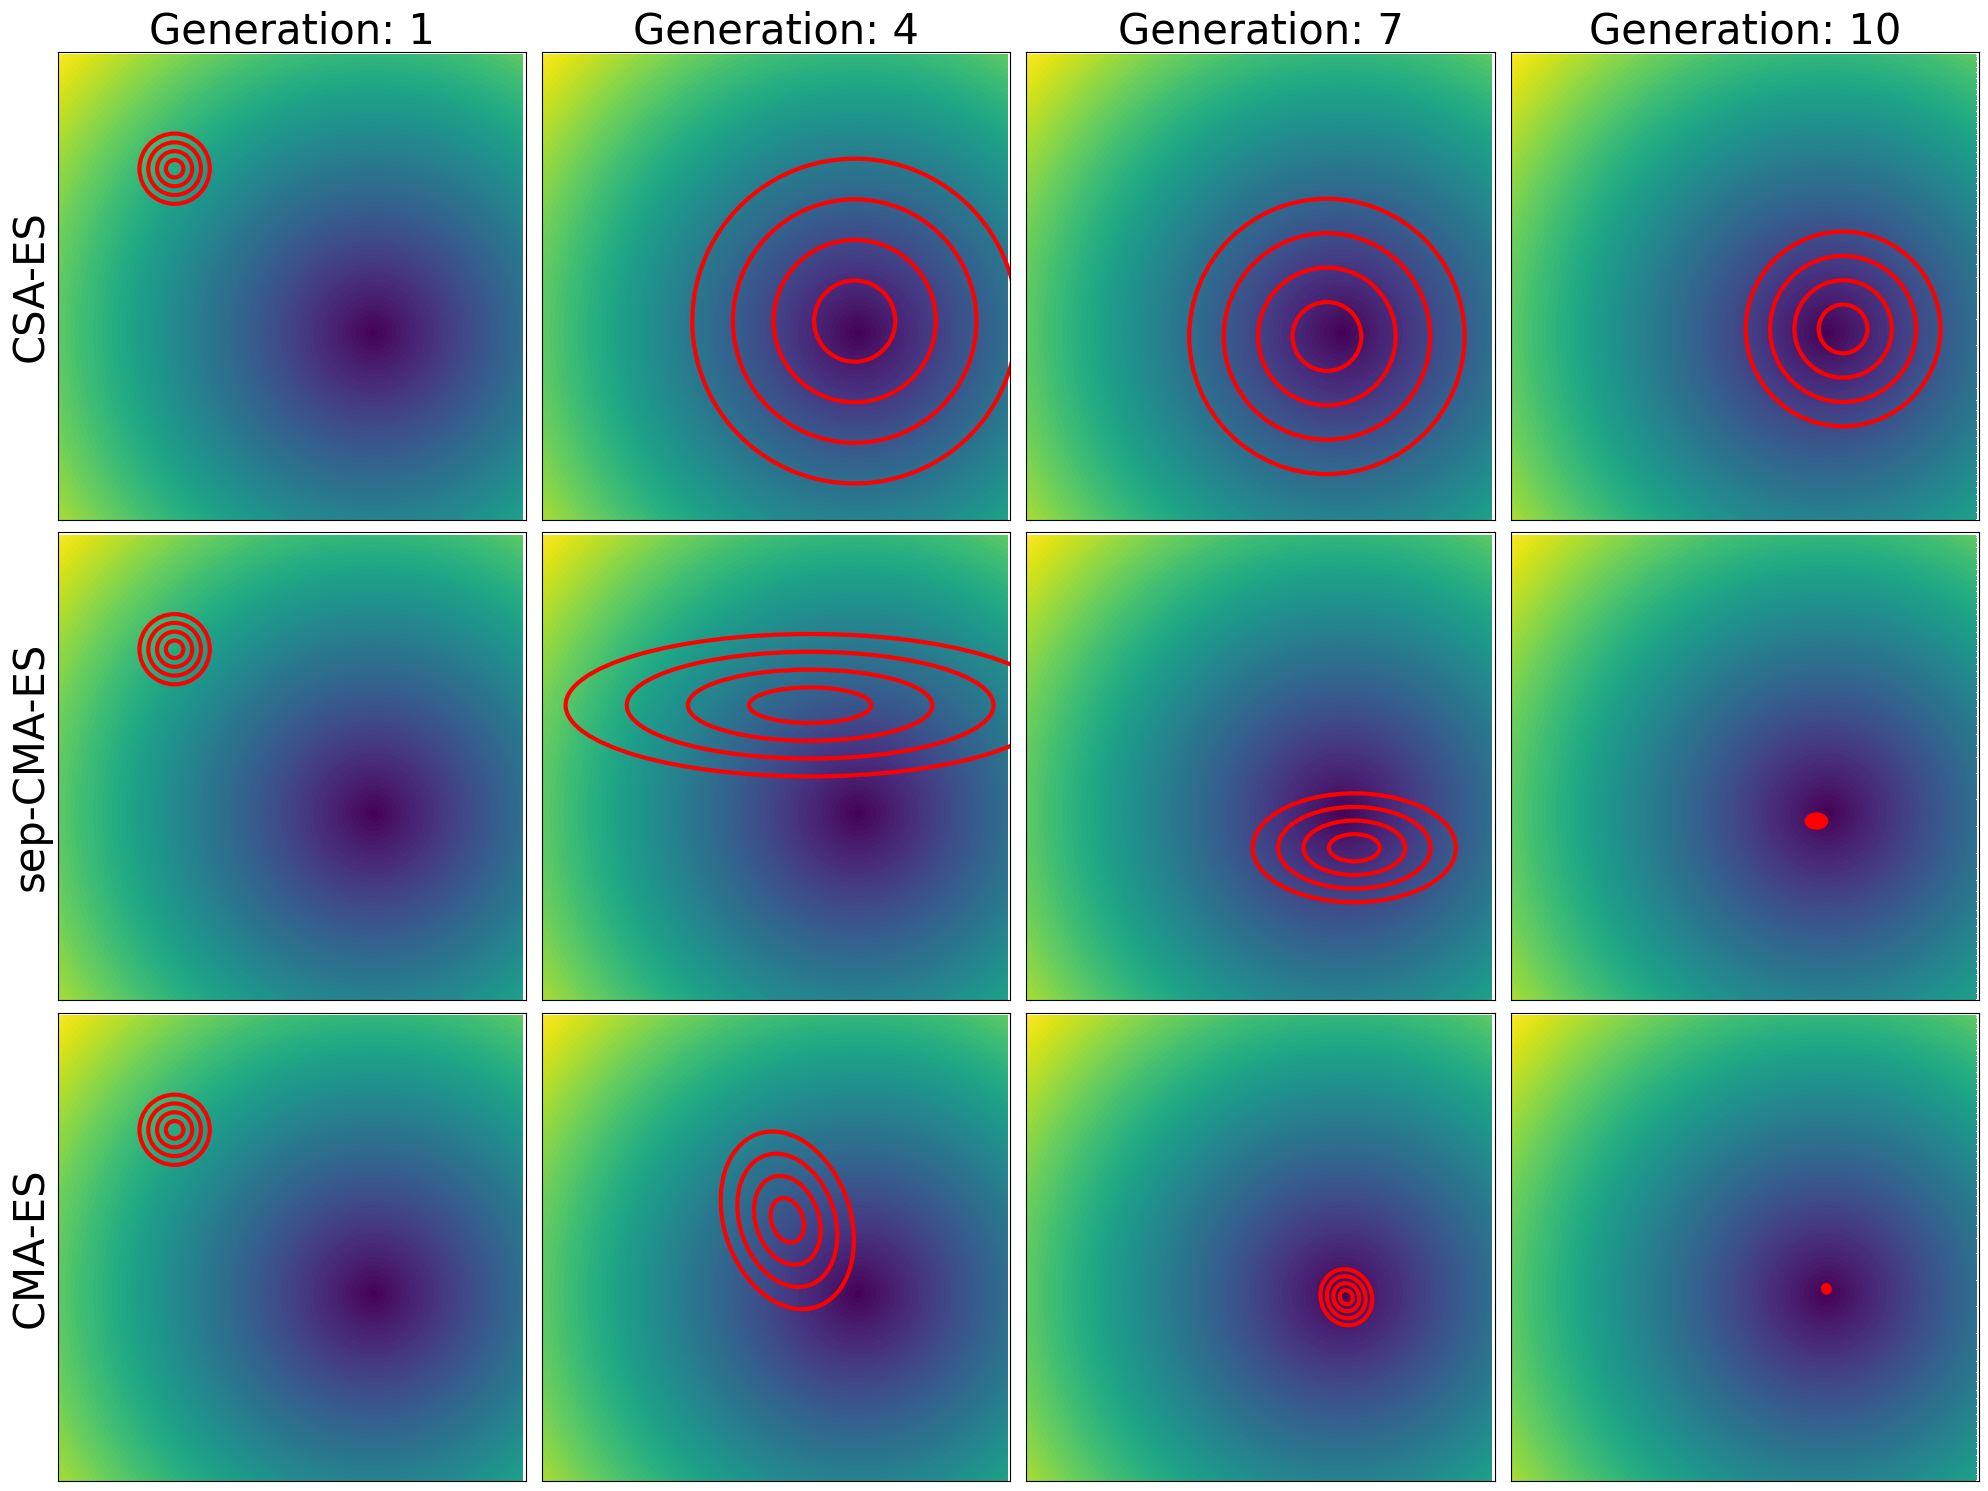

In [37]:
settings = c_maes.parameters.Settings(
    dim, 
    modules, 
    sigma0 = .3, 
    lambda0 = 16,
    budget=300, 
    x0=np.array([-1, 1])
)
cma = c_maes.ModularCMAES(c_maes.Parameters(settings))
c_maes.utils.set_seed(20)

delta = 0.025
x = np.arange(-2, 2, delta)
y = np.arange(-2, 2, delta)
X, Y = np.meshgrid(x, y)
Z = v_func(X, Y)

fig1, axes = plt.subplots(3, 4, figsize=(20, 15), sharey=True, sharex=True)


for axe, label in zip(axes, ("CSA-ES", "sep-CMA-ES", "CMA-ES")):
    cma = c_maes.ModularCMAES(c_maes.Parameters(settings))
    
    for i, ax in enumerate(axe):
        if i == 0:
            ax.set_ylabel(label, fontsize=30)
        ax.set_box_aspect(1)
        ax.contourf(X, Y, Z, levels=100)
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        if label == "CSA-ES":
            ax.set_title(f"Generation: {cma.p.stats.t+1}", fontsize=30)
            
        for i in .5, 1, 1.5, 2:
            angle = 0
            diag = np.diag(cma.p.adaptation.C)
            if label == "CMA-ES":
                angle = np.degrees(np.arctan2(cma.p.adaptation.C[0, 0], cma.p.adaptation.C[1, 0]))
            if label == "CSA-ES":
                diag = np.ones(2)
                
            ax.add_patch(
                Ellipse(
                    cma.p.adaptation.m.copy(), *(i * cma.p.mutation.sigma * diag),
                    angle=angle, 
                    color='red', fill=False,    
                    linewidth=3,
                )
            )
        for _ in range(3):
            cma.step(func)      

ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()